<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [10]:
# load file

file = 'data/job_listings.csv'
df = pd.read_csv(file, usecols=['title', 'description'])[['title', 'description']]
df.head()

,title,description
0,Data scientist,"b""<div><div>Job Requirements:</div><ul><li><p>..."
1,Data Scientist I,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2,Data Scientist - Entry Level,b'<div><p>As a Data Scientist you will be work...
3,Data Scientist,"b'<div class=""jobsearch-JobMetadataHeader icl-..."
4,Data Scientist,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...


In [14]:
from bs4 import BeautifulSoup

# use beautiful soup
def clean_description(df):
    df = df.copy()
    df['description'] = df['description'].str.replace('b"', '')
    df['description'] = df['description'].str.replace("b'", '')
    df = df.applymap(lambda text: BeautifulSoup(text, 'html.parser').get_text())
    return df

df = clean_description(df)
df.head()

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

,title,description
0,Data scientist,Job Requirements:\nConceptual understanding in...
1,Data Scientist I,"Job Description\n\nAs a Data Scientist 1, you ..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA \xe2\x80\x93 multiple locations\...


In [15]:
# use regex to remove unicode

def remove_unicode(df):
    df = df.copy()
    df['description'] = df['description'].str.replace(r'(\\(x|n)[a-z0-9]{0,2})', ' ')
    return df

df = remove_unicode(df)
df.head()

,title,description
0,Data scientist,Job Requirements: Conceptual understanding in ...
1,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,Data Scientist,Location: USA multiple locations + years o...


In [16]:
# check out a couple to make sure they're ok

df.loc[8, 'description']

'MS in a quantitative discipline such as Statistics, Mathematics, Physics, Engineering, Computer Science or Economics5+ years work experienceProficiency in at least one statistical software package such as Python, R or MatlabExpertise using SQL for acquiring and transforming dataOutstanding quantitative modeling and statistical analysis skillsExcellent verbal and written communication skills with the ability to effectively advocate technical solutions to research scientists, engineering teams and business audiences  Where will Amazon\'s growth come from in the next year? What about over the next five? Which product lines are poised to quintuple in size? Are we investing enough in our infrastructure, or too much? How do our customers react to changes in prices, product selection, or delivery times? These are among the most important questions at Amazon today. The Topline Forecast team in the Supply Chain Optimization Technologies (SCOT) organization is dedicated to answering these quest

In [17]:
# some slashes but looks alright, check another

df.loc[15, 'description']

'The Atlantic is seeking a Data Scientist to help lead research and analysis initiatives and support ongoing delivery of key insights to drive business growth and overall impact. The role will work closely with partners in Consumer Revenue, Advertising, Editorial, and Product to understand performance, identify and predict opportunities for improvement, and develop plans of action to maximize revenue, audience growth, and editorial engagement. This is a great opportunity to be part of a growing team and help shape the way we develop, deploy, and operate production quality analytics systems and processes   and have an impact on how The Atlantic uses data in the years to come. Responsibilities: Lead research projects from hypothesis formation to delivering findings and recommendations to stakeholders Use supervised and unsupervised machine learning techniques to make predictions and categorize Design, execute, and evaluate tests across the company Guide the development of reports, dashbo

## 2) Use Spacy to tokenize the listings 

In [19]:
# define stop words, omit data science
nlp = spacy.load("en_core_web_lg")
stop_words = nlp.Defaults.stop_words.union(['data', 'science'])

# tokenize
df['tokens'] = df['description'].apply(lambda x: [token.lemma_ for token in nlp(x) 
                                                  if (token not in stop_words)
                                                 and (token.is_punct !=True)])
df.sample(10)

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,title,description,tokens
31,Data Scientist,We re looking for a Data Scientist in our gr...,"[-PRON-, , re, look, for, a, Data, scientist..."
360,Data Scientist,RiskIQ is the world leader in Attack Surface M...,"[RiskIQ, be, the, world, leader, in, Attack, S..."
338,Manufacturing Data Scientist,The FCA Manufacturing Planning and Control (MP...,"[the, FCA, Manufacturing, Planning, and, Contr..."
20,Assistant Data Scientist,"$45,000 a yearWorking under direction of the A...","[$, 45,000, a, yearworking, under, direction, ..."
13,Associate Data Scientist – Premium Analytics,As Spotify Premium swells to over 96M subscrib...,"[as, Spotify, Premium, swell, to, over, 96, M,..."
260,Junior Data Scientist,You will collaborate with the brightest techni...,"[-PRON-, will, collaborate, with, the, bright,..."
110,Data Scientist,Invitae envisions a world in which genomic seq...,"[Invitae, envision, a, world, in, which, genom..."
307,Data Scientist,Job Description Toomey Technologies has immed...,"[job, description, , Toomey, Technologies, ha..."
22,Data Scientist – Personalization,We are seeking a Data Scientist to join our Pr...,"[-PRON-, be, seek, a, Data, scientist, to, joi..."
299,Data Scientist,Company: AllazoHealth Location: New York City ...,"[company, AllazoHealth, location, New, York, C..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [20]:
count_vect = CountVectorizer()

dtm = count_vect.fit_transform(df['description'])
dtm_df = pd.DataFrame(dtm.todense(), columns=count_vect.get_feature_names())
dtm_df.head()


#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

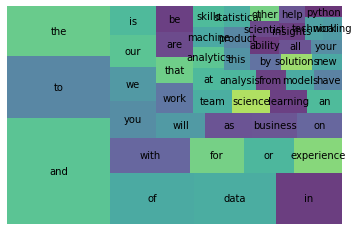

In [23]:
import squarify

word_ranks = dtm_df.sum().sort_values(ascending=False)
squarify.plot(sizes=word_ranks.values[:50], label=word_ranks.index[:50], alpha=0.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [25]:
# Instantiate vectorizor (tfidf)

tfidf = TfidfVectorizer(stop_words = 'english')

dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# View as dataframe

dtm_tfidf_df.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.106249,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [30]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_df)

# idea job description

job_desc = ["""
My idea job would be something in the realm of bitcoin or more generally just fintech. I have very little 
interest in fintech but would love to use it to get experience for the real dream job which is 
to work on bitcoin or for a bitcoin related company full time.
"""]

In [31]:
# Query for it

query = tfidf.transform(job_desc)

In [32]:
query

<1x8477 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [33]:
# Use NN to find closest fit

nn.kneighbors(query.todense())

(array([[1.26148597, 1.26148597, 1.35525342, 1.3584392 , 1.36366347]]),
 array([[172,  76, 263, 140,  92]]))

In [36]:
# relevant results

df.loc[172]['description']

'Title: Data Scientist This role is designed for people who like to dig into data, figure out what matters, and communicate those insights to others. Fast. Background At numo, we create and incubate new "fintech" companies. numo seeks a business-minded, results-oriented data scientist who wants to see the insights they derive be put to work in early stage product concepts. The Venture team, which you will be a key member of, sits at the fuzzy front end of the idea pipeline, partnering with internal stakeholders, 3rd-parties and academics to define new product development opportunities in the fintech space. We\\\'re looking for a hands-on data wizard who wants to experiment with new data sources, analyze data, problem solve about how data can be used, develop predictive models, and deploy and maintain these models as they become part of our product portfolio. Our venture team includes product and business experts, and now we\\\'re seeking to build our data science competency in the spac

In [38]:
df.loc[263]['description']

"Trading Technologies team is looking for a senior data scientist who is a self-starter and an excellent team player. You will be part of a team who is building cutting-edge trading products in cryptocurrency industry. You will be responsible for transforming data into insights at Kraken. You will collaborate with product management, engineering and data team to build advanced analytics leveraging data to discover opportunities, insights and help improve performance of trading products and business. Our technology team is having a blast while delivering the most sophisticated crypto-trading platform out there. Help us continue to define and lead the industry.   Responsibilities: Partner with product management and trading technology stakeholders in providing actionable data driven insights to improve the trading technology products. Develop anomaly detection, and data modelling tools to monitor key performance indicators to improve the efficiency of the trading products. Build self-ser

In [ ]:
# whoa I know kraken! This is awesome!

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 